# Importing Libraries

In [2]:
# import the necessary packages
from keras.applications import MobileNetV2
from keras import layers
from keras.models import Model
from keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os, sys


In [3]:
!pip install imutils

  Preparing metadata (setup.py) ... - \ done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=a6c34c8ce6cd4cedd2f6a35359632a84d4b4bd74d569468de0a3dac9c32beaef
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [3]:
import warnings
warnings.filterwarnings('ignore')
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.optimizers.legacy import Adam

# Reading Dataset

- X = Preprocessed Image data (pixel array)
- y = labels (Masked or not Masked)

In [4]:
image = load_img("../Dataset/with_mask/0_0_ 2020-02-23 132115.png")
image = img_to_array(image)
print("(height, width, color) : ", image.shape)

(height, width, color) :  (318, 218, 3)


In [6]:
image = preprocess_input(image)
print("Scaled image between -1 to 1")
image

Scaled image between -1 to 1


array([[[-0.8901961 , -0.90588236, -0.8352941 ],
        [-0.88235295, -0.90588236, -0.8352941 ],
        [-0.8745098 , -0.8980392 , -0.827451  ],
        ...,
        [ 0.77254903,  0.75686276,  0.77254903],
        [ 0.7411765 ,  0.7176471 ,  0.7411765 ],
        [ 0.58431375,  0.56078434,  0.58431375]],

       [[-0.8901961 , -0.8980392 , -0.827451  ],
        [-0.8745098 , -0.8980392 , -0.827451  ],
        [-0.8745098 , -0.8980392 , -0.827451  ],
        ...,
        [ 0.2313726 ,  0.21568632,  0.2313726 ],
        [ 0.62352943,  0.60784316,  0.62352943],
        [ 0.64705884,  0.6313726 ,  0.64705884]],

       [[-0.8901961 , -0.8980392 , -0.827451  ],
        [-0.8745098 , -0.8980392 , -0.827451  ],
        [-0.88235295, -0.90588236, -0.8352941 ],
        ...,
        [-0.19215685, -0.21568626, -0.19215685],
        [ 0.26274514,  0.23921573,  0.26274514],
        [ 0.5294118 ,  0.5137255 ,  0.5294118 ]],

       ...,

       [[-0.90588236, -0.92156863, -0.8117647 ],
        [-0

In [7]:
folder_names = ["with_mask", "without_mask"]
X = []
y = []

for folder in folder_names:
    path = os.path.join('/Dataset', folder )

    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        image = load_img(image_path, target_size=(224, 224)) # image read
        image = img_to_array(image) # pixel arraty
        image = preprocess_input(image) #scaling 
        
        X.append(image)
        y.append(folder)

In [8]:
y = np.array(y)
X = np.array(X)
X

array([[[[-0.6862745 , -0.6313726 , -0.5686275 ],
         [-0.6862745 , -0.6313726 , -0.5686275 ],
         [-0.8509804 , -0.78039217, -0.7254902 ],
         ...,
         [-0.9529412 , -0.9137255 , -0.7647059 ],
         [-0.8509804 , -0.79607844, -0.64705884],
         [-0.8509804 , -0.79607844, -0.64705884]],

        [[-0.6862745 , -0.6313726 , -0.5686275 ],
         [-0.6862745 , -0.6313726 , -0.5686275 ],
         [-0.8509804 , -0.78039217, -0.7254902 ],
         ...,
         [-0.9529412 , -0.9137255 , -0.7647059 ],
         [-0.8509804 , -0.79607844, -0.64705884],
         [-0.8509804 , -0.79607844, -0.64705884]],

        [[-0.6784314 , -0.62352943, -0.54509807],
         [-0.6784314 , -0.62352943, -0.54509807],
         [-0.8901961 , -0.81960785, -0.7490196 ],
         ...,
         [-0.9137255 , -0.8745098 , -0.7254902 ],
         [-0.8980392 , -0.85882354, -0.70980394],
         [-0.8980392 , -0.85882354, -0.70980394]],

        ...,

        [[-0.8117647 , -0.69411767, -0

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1) # converting array into column vector 
y = encoder.fit_transform(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# Train Test Split

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y,
                                                      test_size=0.20,
                                                      stratify=y, # class distribution is preserved in both the training and testing datasets based on y 
                                                      random_state=42)

In [11]:
X_train.shape, X_test.shape

((800, 224, 224, 3), (200, 224, 224, 3))

In [12]:
y_train.shape, y_test.shape

((800, 2), (200, 2))

# Model Train

In [13]:
augmentation = ImageDataGenerator(rotation_range=20,
                                  zoom_range=0.15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.15,
                                  horizontal_flip=True,
                                  fill_mode="nearest") 

In [14]:
baseModel = MobileNetV2(weights="imagenet", 
                        include_top=False, # to add my own layers
                        input_tensor=layers.Input(shape=(224, 224, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [15]:
headModel = baseModel.output # Assigning output of BaseModel to top model as input
headModel = layers.AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = layers.Flatten(name="flatten")(headModel) # 1D faltten
headModel = layers.Dense(128, activation="relu")(headModel)
headModel = layers.Dropout(0.5)(headModel) # CallBack
headModel = layers.Dense(2, activation="softmax")(headModel)

In [16]:
# combine head and base models
model = Model(inputs=baseModel.input, outputs=headModel)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

## Model Compiling

In [19]:
# complile our model 
model.compile(loss="binary_crossentropy", 
              optimizer=Adam(lr=0.0001, 
              decay=0.0001 / 20), 
              metrics=["accuracy"])

## Model fitting 

In [20]:

history = model.fit(augmentation.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) // 32,
                    epochs=20)

Epoch 1/20
25/25 [==============================] - 23s 442ms/step - loss: 0.4014 - accuracy: 0.8475 - val_loss: 1.1675 - val_accuracy: 0.6050
Epoch 2/20
25/25 [==============================] - 9s 361ms/step - loss: 0.0697 - accuracy: 0.9875 - val_loss: 1.7762 - val_accuracy: 0.6200
Epoch 3/20
25/25 [==============================] - 10s 399ms/step - loss: 0.0282 - accuracy: 0.9950 - val_loss: 1.2711 - val_accuracy: 0.7450
Epoch 4/20
25/25 [==============================] - 9s 360ms/step - loss: 0.0388 - accuracy: 0.9862 - val_loss: 1.2257 - val_accuracy: 0.7350
Epoch 5/20
25/25 [==============================] - 9s 357ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.9614 - val_accuracy: 0.7950
Epoch 6/20
25/25 [==============================] - 10s 388ms/step - loss: 0.0161 - accuracy: 0.9975 - val_loss: 0.7704 - val_accuracy: 0.8300
Epoch 7/20
25/25 [==============================] - 9s 360ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.3992 - val_accuracy: 0.9000
Epo

## Model Prediction

In [21]:
y_pred = model.predict(X_test, batch_size=32)

7/7 [==============================] - 1s 79ms/step


In [22]:
# label encode
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [24]:
y_pred.shape

(200,)

In [25]:
print("Accuracy Score :", accuracy_score(y_test.argmax(axis=1), y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test.argmax(axis=1), y_pred))
print(classification_report(y_test.argmax(axis=1), y_pred))

Accuracy Score : 0.96
Confusion Matrix : 
 [[93  7]
 [ 1 99]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       100
           1       0.93      0.99      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [26]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.401389,0.84750,1.167524,0.605
1,0.069718,0.98750,1.776174,0.620
2,0.028235,0.99500,1.271146,0.745
3,0.038810,0.98625,1.225699,0.735
4,0.034438,0.99000,0.961375,0.795
5,0.016108,0.99750,0.770391,0.830
6,0.012593,0.99625,0.399214,0.900
7,0.007092,0.99875,0.810601,0.850
8,0.006038,1.00000,0.730787,0.870
9,0.009540,0.99750,0.517767,0.900


<Axes: >

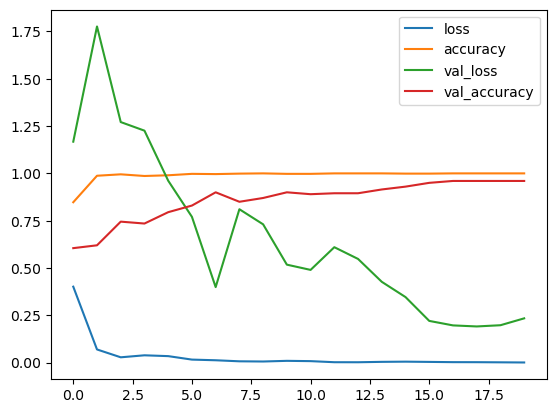

In [27]:
pd.DataFrame(history.history).plot()

## Save Model

In [28]:
model.save('Mask_detection_model.h5')